In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt

In [64]:
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [65]:
df = pd.read_csv('Complaints.csv')

In [66]:
precincts = pd.DataFrame(columns = ['precinct'])

In [67]:
precincts['precinct'] = np.sort(df['precinct'].unique())

In [68]:
precincts = precincts.join(df.groupby(['precinct']).size().to_frame(name = 'Number of Complaints'),on = 'precinct')

In [69]:
precincts.loc[12]['Number of Complaints'] = precincts.loc[12]['Number of Complaints'] + precincts.loc[77]['Number of Complaints']

In [70]:
precincts = precincts.drop([77])

In [71]:
keys = precincts['precinct'].unique()

In [72]:
values = [190,141,164,142,178,162,190,307,141,294,207,
         149,120,176,156,210,134,167,142,205,191,201,
         284,186,221,293,358,174,306,280,252,193,133,
         282,202,167,154,155,138,333,138,161,303,216,
         179,275,399,139,235,198,247,197,209,221,155,
         185,142,145,206,209,254,182,310,225,197,148,
         292,211,153,144,236,261,234,311,196,195,144]

In [73]:
UniformedDict = dict(zip(keys,values))
def amtUniformed(precinct):
    return UniformedDict[precinct]

In [74]:
precincts['Uniformed Officers'] = precincts['precinct']

In [75]:
precincts['Uniformed Officers'] = precincts['Uniformed Officers'].apply(amtUniformed)

In [88]:
precincts['Normalize'] = precincts['Number of Complaints'] / precincts['Uniformed Officers']

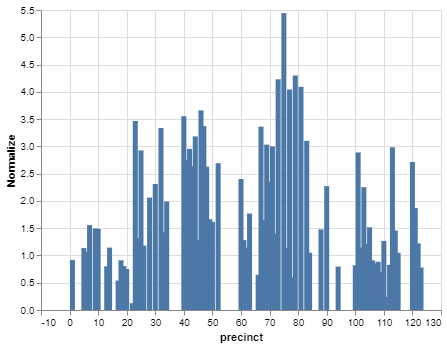

In [89]:
alt.Chart(precincts).mark_bar().encode(
    x = 'precinct',
    y = 'Normalize',
)

In [90]:
precincts

,precinct,Number of Complaints,Uniformed Officers,Normalize
0,1,174,190,0.915789
1,5,160,141,1.134752
2,6,175,164,1.067073
3,7,221,142,1.556338
4,9,266,178,1.494382
...,...,...,...,...
72,115,245,234,1.047009
73,120,844,311,2.713826
74,121,366,196,1.867347
75,122,238,195,1.220513
